# Import Python Libraries

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

# Creating Dataframes

In [2]:
data = pd.read_csv("data/listings_Sep_22.csv")

data.shape

/var/folders/sj/tbs4vnjn7h7f5_2xqbzb2r6c0000gn/T/ipykernel_14609/680783725.py:1: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/listings_Sep_22.csv")


(39881, 75)

In [3]:
important_columns = [
    'id',
    # 'last_scraped',
    # 'name',
    # 'description',
    'host_location',
    'host_response_time',
    'host_response_rate',
    'host_neighbourhood',
    'neighbourhood_cleansed',
    'neighbourhood_group_cleansed',
    'latitude',
    'longitude',
    'property_type',
    'room_type',
    'accommodates',
    # 'bathrooms',
    # 'bathrooms_text',
    'bedrooms',
    'beds',
    # 'amenities',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'instant_bookable',
    'price'
    ]
df = data[important_columns]

df.head()

id host_location host_response_time host_response_rate  \
0   2539  New York, NY     within an hour               100%   
1   2595  New York, NY       within a day                75%   
2   5121  New York, NY     within an hour               100%   
3  45910  New York, NY     within an hour               100%   
4   5136  New York, NY                NaN                NaN   

   host_neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed  \
0           Gravesend             Kensington                     Brooklyn   
1             Midtown                Midtown                    Manhattan   
2  Bedford-Stuyvesant     Bedford-Stuyvesant                     Brooklyn   
3           Ridgewood              Ridgewood                       Queens   
4   Greenwood Heights            Sunset Park                     Brooklyn   

   latitude  longitude                property_type        room_type  \
0  40.64529  -73.97238  Private room in rental unit     Private room   
1  40.75356  -73.98559           Entire rental unit  Entire home/apt   
2  40.68535  -73.95512  Private room in rental unit     Private room   
3  40.70309  -73.89963             Entire townhouse  Entire home/apt   
4  40.66265  -73.99454           Entire rental unit  Entire home/apt   

   accommodates  bedrooms  beds  availability_30  availability_60  \
0             2       1.0   1.0               21               51   
1             1       NaN   1.0                0                0   
2             2       1.0   1.0                5               30   
3            16       5.0  10.0               30               60   
4             4       2.0   2.0                0                0   

   availability_90  availability_365 instant_bookable    price  
0               81               356                f  $299.00  
1                5               280                f  $175.00  
2               60               335                f   $60.00  
3               90               365                f  $425.00  
4                0               179                f  $275.00

In [4]:
#original datatypes 
df.dtypes

id                                int64
host_location                    object
host_response_time               object
host_response_rate               object
host_neighbourhood               object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bedrooms                        float64
beds                            float64
availability_30                   int64
availability_60                   int64
availability_90                   int64
availability_365                  int64
instant_bookable                 object
price                            object
dtype: object

In [5]:
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'].str.replace("%",''))
df['instant_bookable'] = np.where(df['instant_bookable'] == 't', True, False)
df['price'] = df['price'].str.replace("$","")
df['price'] = pd.to_numeric(df['price'].str.replace(",",""))

/var/folders/sj/tbs4vnjn7h7f5_2xqbzb2r6c0000gn/T/ipykernel_14609/3731789118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_response_rate'] = pd.to_numeric(df['host_response_rate'].str.replace("%",''))
/var/folders/sj/tbs4vnjn7h7f5_2xqbzb2r6c0000gn/T/ipykernel_14609/3731789118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['instant_bookable'] = np.where(df['instant_bookable'] == 't', True, False)
/var/folders/sj/tbs4vnjn7h7f5_2xqbzb2r6c0000gn/T/ipykernel_14609/3731789118.py:3: FutureWar

In [6]:
#updated columnd datatypes 
df.dtypes

id                                int64
host_location                    object
host_response_time               object
host_response_rate              float64
host_neighbourhood               object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bedrooms                        float64
beds                            float64
availability_30                   int64
availability_60                   int64
availability_90                   int64
availability_365                  int64
instant_bookable                   bool
price                           float64
dtype: object

In [7]:
#percentage of empty cells
df.isna().sum()/len(df)*100

id                               0.000000
host_location                   17.258845
host_response_time              33.971064
host_response_rate              33.971064
host_neighbourhood              20.638901
neighbourhood_cleansed           0.000000
neighbourhood_group_cleansed     0.000000
latitude                         0.000000
longitude                        0.000000
property_type                    0.000000
room_type                        0.000000
accommodates                     0.000000
bedrooms                         9.485720
beds                             2.216594
availability_30                  0.000000
availability_60                  0.000000
availability_90                  0.000000
availability_365                 0.000000
instant_bookable                 0.000000
price                            0.000000
dtype: float64

In [8]:
#percentage of duplicated rows
df.duplicated().sum()/len(df)*100

0.0

In [9]:
#create a new dataframe with no duplicates and empty cells
full_df = df.dropna().drop_duplicates().drop('id', axis=1).reset_index(drop=True)
full_df.head()

host_location  host_response_time  host_response_rate  \
0             New York, NY      within an hour               100.0   
1             New York, NY      within an hour               100.0   
2             New York, NY      within an hour               100.0   
3  New York, United States      within an hour                99.0   
4             New York, NY  within a few hours               100.0   

   host_neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed  \
0           Gravesend             Kensington                     Brooklyn   
1  Bedford-Stuyvesant     Bedford-Stuyvesant                     Brooklyn   
2           Ridgewood              Ridgewood                       Queens   
3          Greenpoint             Greenpoint                     Brooklyn   
4      Hell's Kitchen                Midtown                    Manhattan   

   latitude  longitude                property_type        room_type  \
0  40.64529  -73.97238  Private room in rental unit     Private room   
1  40.68535  -73.95512  Private room in rental unit     Private room   
2  40.70309  -73.89963             Entire townhouse  Entire home/apt   
3  40.73777  -73.95366       Room in boutique hotel       Hotel room   
4  40.76457  -73.98317  Private room in rental unit     Private room   

   accommodates  bedrooms  beds  availability_30  availability_60  \
0             2       1.0   1.0               21               51   
1             2       1.0   1.0                5               30   
2            16       5.0  10.0               30               60   
3             2       1.0   1.0               15               42   
4             2       1.0   1.0                2                4   

   availability_90  availability_365  instant_bookable  price  
0               81               356             False  299.0  
1               60               335             False   60.0  
2               90               365             False  425.0  
3               72               217             False  308.0  
4                7               160             False   68.0

# EDA of Features

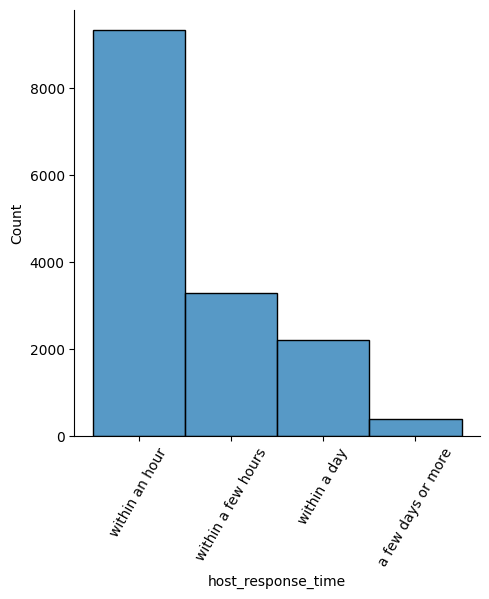

In [10]:
sns.displot(data=full_df, x='host_response_time')
plt.xticks(rotation=60)
plt.show()

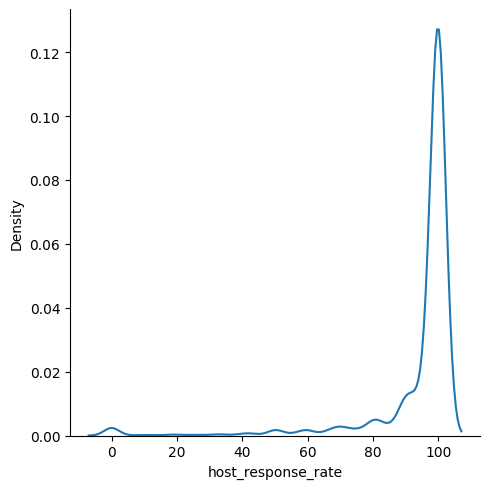

In [11]:
#distribution of host response rate
sns.displot(data=full_df, x='host_response_rate', kind="kde")
plt.show()

In [12]:
#top 25 host neighborhood
full_df.host_neighbourhood.value_counts().head(25)

Bedford-Stuyvesant    1102
Williamsburg           785
Jamaica                633
Bushwick               629
Flushing               566
Cambridge              553
Flatbush               516
Upper East Side        503
Crown Heights          489
Harlem                 487
Greenpoint             447
Elmhurst               385
Astoria                308
Hell's Kitchen         279
Long Island City       233
Park Slope             227
Upper West Side        212
East Harlem            202
Clinton Hill           202
East Flatbush          176
Ocean Hill             168
Hamilton Heights       168
East New York          161
Sunset Park            138
The Rockaways          134
Name: host_neighbourhood, dtype: int64

In [13]:
#top 25 host neighborhood
full_df.host_location.value_counts().head(25)

New York, NY                 11120
New York, United States       2496
United States                  244
Hawthorne, NJ                   89
Miami, FL                       79
Los Angeles, CA                 69
San Francisco, CA               60
Jersey City, NJ                 44
Yonkers, NY                     39
Philadelphia, PA                20
Mount Vernon, NY                19
Washington, DC                  19
Florida, United States          16
London, United Kingdom          16
California, United States       15
Atlanta, GA                     14
Chicago, IL                     13
Valley Stream, NY               13
Mineola, NY                     13
Orlando, FL                     12
Houston, TX                     12
Paris, France                   12
Bayonne, NJ                     12
Greenville, DE                  11
Wantagh, NY                     11
Name: host_location, dtype: int64

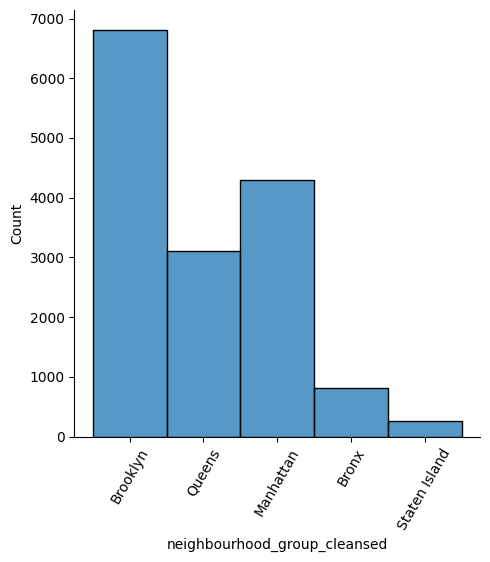

In [14]:
#distribution of listings based borough
sns.displot(data=full_df, x='neighbourhood_group_cleansed')
plt.xticks(rotation=60)
plt.show()

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

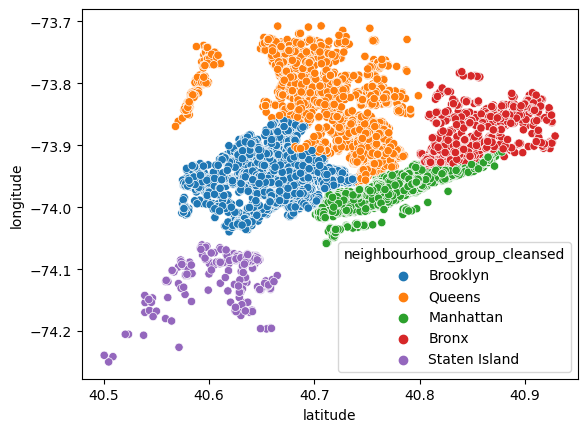

In [15]:
#scatter plot of listings 
sns.scatterplot(data=full_df, x='latitude', y='longitude', hue='neighbourhood_group_cleansed')

In [16]:
fig = px.scatter_mapbox(df, 
    lat="latitude", 
    lon="longitude", 
    hover_name="id", 
    hover_data=["neighbourhood_cleansed","host_neighbourhood","neighbourhood_group_cleansed"], 
    color_discrete_sequence=["#3366CC"]
    )
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

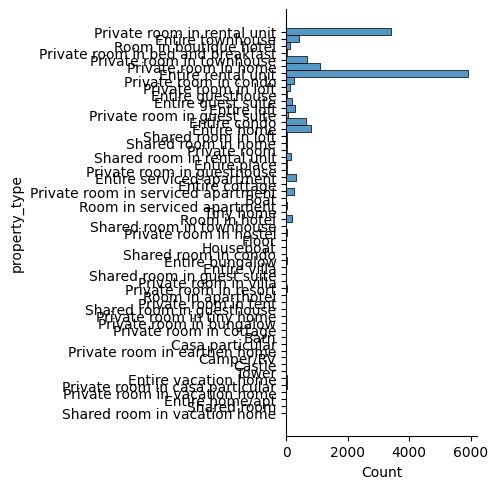

In [17]:
# distribution of property_type
sns.displot(data=full_df, y='property_type')
plt.show()

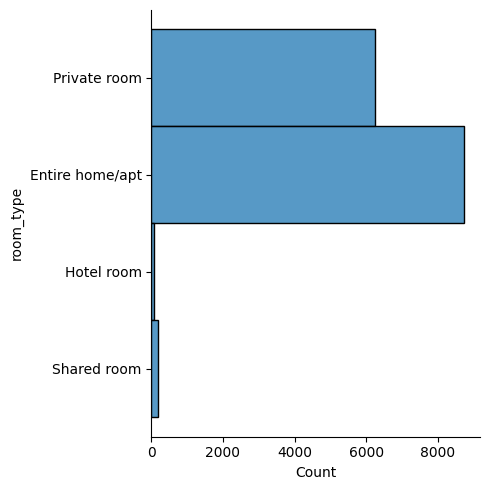

In [18]:
# distribution of room_type
sns.displot(data=full_df, y='room_type')
plt.show()

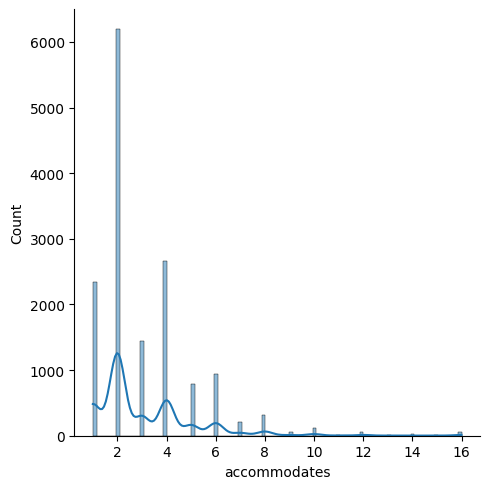

In [19]:
#distribution of accommodates
sns.displot(data=full_df, x='accommodates', kde=True)
plt.show()

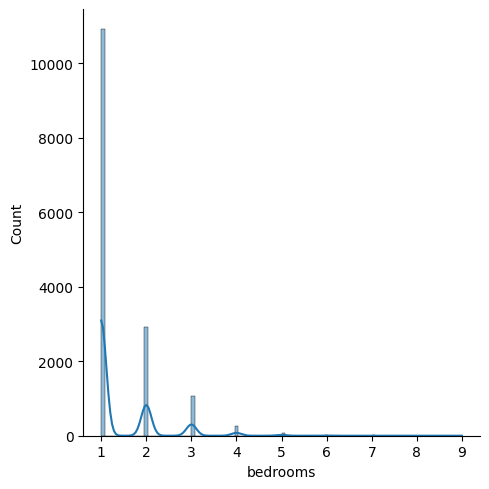

In [20]:
#distribution of bedrooms
sns.displot(data=full_df, x='bedrooms', kde=True)
plt.show()

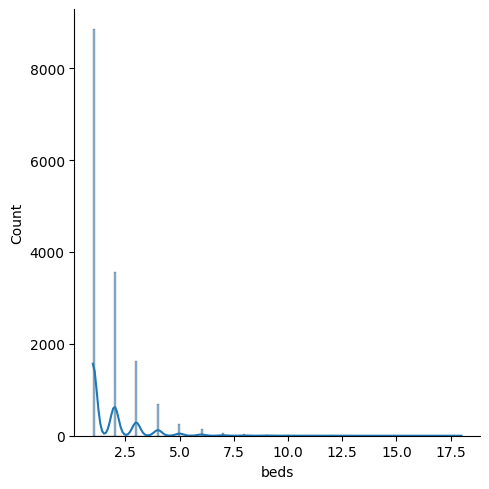

In [21]:
#distribution of beds
sns.displot(data=full_df, x='beds', kde=True)
plt.show()

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



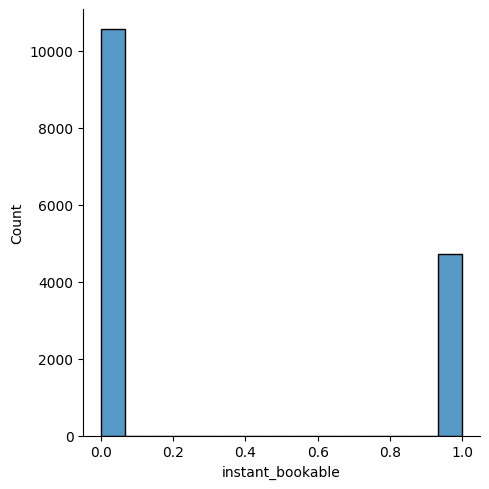

In [22]:
#distribution of instant_bookable
sns.displot(data=full_df, x='instant_bookable')
plt.show()

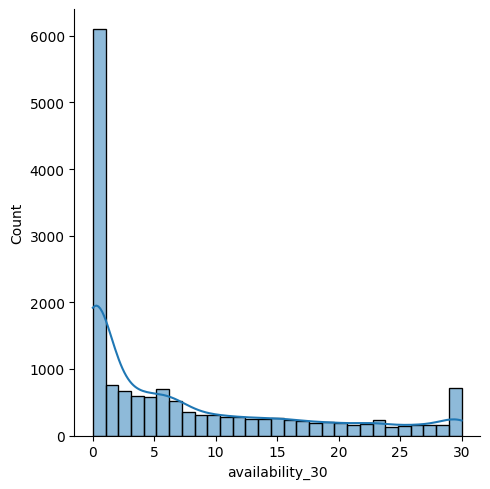

In [23]:
#distribution of availability_30
sns.displot(data=full_df, x='availability_30', kde=True)
plt.show()

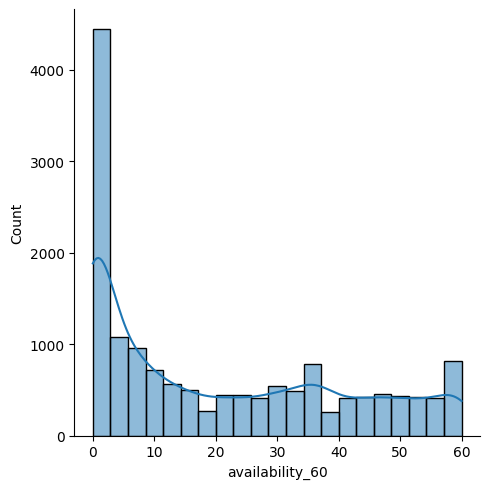

In [24]:
#distribution of availability_60
sns.displot(data=full_df, x='availability_60', kde=True)
plt.show()

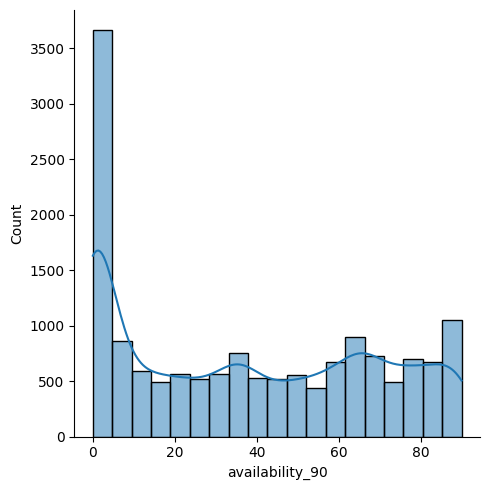

In [25]:
#distribution of availability_90
sns.displot(data=full_df, x='availability_90', kde=True)
plt.show()

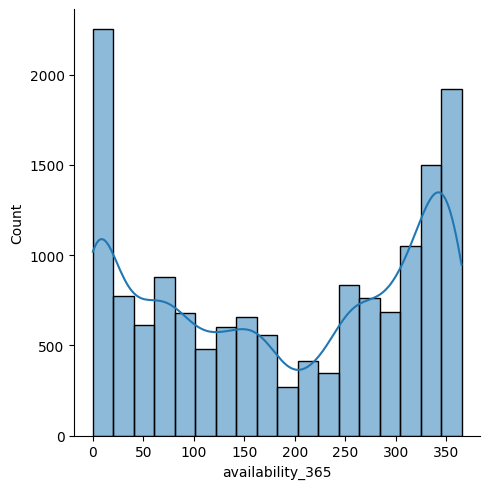

In [26]:
#distribution of availability_365
sns.displot(data=full_df, x='availability_365', kde=True)
plt.show()

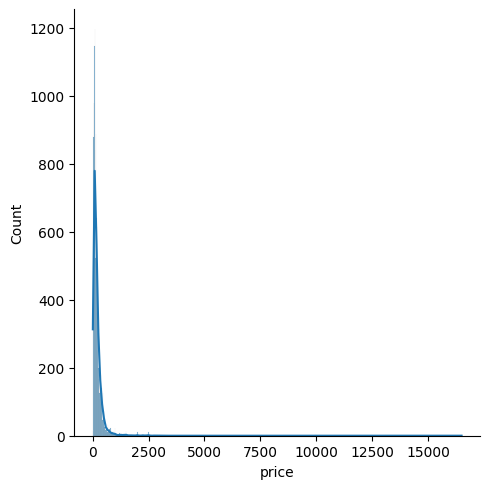

In [27]:
#distribution of price
sns.displot(data=full_df, x='price', kde=True)
plt.show()

# Feature Engineering

In [28]:
model_df = full_df.copy()
model_df.head()

host_location  host_response_time  host_response_rate  \
0             New York, NY      within an hour               100.0   
1             New York, NY      within an hour               100.0   
2             New York, NY      within an hour               100.0   
3  New York, United States      within an hour                99.0   
4             New York, NY  within a few hours               100.0   

   host_neighbourhood neighbourhood_cleansed neighbourhood_group_cleansed  \
0           Gravesend             Kensington                     Brooklyn   
1  Bedford-Stuyvesant     Bedford-Stuyvesant                     Brooklyn   
2           Ridgewood              Ridgewood                       Queens   
3          Greenpoint             Greenpoint                     Brooklyn   
4      Hell's Kitchen                Midtown                    Manhattan   

   latitude  longitude                property_type        room_type  \
0  40.64529  -73.97238  Private room in rental unit     Private room   
1  40.68535  -73.95512  Private room in rental unit     Private room   
2  40.70309  -73.89963             Entire townhouse  Entire home/apt   
3  40.73777  -73.95366       Room in boutique hotel       Hotel room   
4  40.76457  -73.98317  Private room in rental unit     Private room   

   accommodates  bedrooms  beds  availability_30  availability_60  \
0             2       1.0   1.0               21               51   
1             2       1.0   1.0                5               30   
2            16       5.0  10.0               30               60   
3             2       1.0   1.0               15               42   
4             2       1.0   1.0                2                4   

   availability_90  availability_365  instant_bookable  price  
0               81               356             False  299.0  
1               60               335             False   60.0  
2               90               365             False  425.0  
3               72               217             False  308.0  
4                7               160             False   68.0

In [29]:
#feature engineering from existing columns
model_df = pd.get_dummies(model_df, columns=['instant_bookable'], drop_first=True)
model_df = pd.get_dummies(model_df, columns=['room_type','property_type'], drop_first=True)
model_df = pd.get_dummies(model_df, columns=['neighbourhood_cleansed','neighbourhood_group_cleansed'], drop_first=True)
model_df = pd.get_dummies(model_df, columns=['host_response_time','host_neighbourhood'], drop_first=True)

#feature engineering from created columns
model_df['host_location_in_ny'] = np.where(model_df['host_location'].str.contains("NY|New York"), True, False)
model_df.drop("host_location", axis=1, inplace=True)
model_df = pd.get_dummies(model_df, columns=['host_location_in_ny'], drop_first=True)
model_df.head()

host_response_rate  latitude  longitude  accommodates  bedrooms  beds  \
0               100.0  40.64529  -73.97238             2       1.0   1.0   
1               100.0  40.68535  -73.95512             2       1.0   1.0   
2               100.0  40.70309  -73.89963            16       5.0  10.0   
3                99.0  40.73777  -73.95366             2       1.0   1.0   
4               100.0  40.76457  -73.98317             2       1.0   1.0   

   availability_30  availability_60  availability_90  availability_365  ...  \
0               21               51               81               356  ...   
1                5               30               60               335  ...   
2               30               60               90               365  ...   
3               15               42               72               217  ...   
4                2                4                7               160  ...   

   host_neighbourhood_Woodrow  host_neighbourhood_Woodside  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   host_neighbourhood_Woodstock  host_neighbourhood_Wynwood  \
0                             0                           0   
1                             0                           0   
2                             0                           0   
3                             0                           0   
4                             0                           0   

   host_neighbourhood_Yehuda Hamaccabi  host_neighbourhood_Yorkville  \
0                                    0                             0   
1                                    0                             0   
2                                    0                             0   
3                                    0                             0   
4                                    0                             0   

   host_neighbourhood_Zephyr Cove  host_neighbourhood_Zona Romántica  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   host_neighbourhood_Zona Sin Asignación de Nombre de Colonia 1  \
0                                                  0               
1                                                  0               
2                                                  0               
3                                                  0               
4                                                  0               

   host_location_in_ny_True  
0                         1  
1                         1  
2                         1  
3                         1  
4                         1  

[5 rows x 750 columns]

# Creating Machine Learning Model

In [36]:
X = model_df.drop("price", axis=1).values #features
y = model_df["price"] #target



In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()

reg.fit(X_train, y_train)

print("mean squared error for train",mean_squared_error(y_train, reg.predict(X_train)))
print("mean squared error for test",mean_squared_error(y_test, reg.predict(X_test)))

mean squared error for train 60102.580789669926
mean squared error for test 1.321373798151502e+17
